# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

In [2]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [3]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [4]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [5]:
X_train = X[X.pickup_year < 2015]
X_test = X[X.pickup_year == 2015]
Y_train = y[y.index == y.index.where(X.pickup_year < 2015)]
Y_test = y[y.index == y.index.where(X.pickup_year == 2015)]

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

## Normal Random Forest Regressor

In [6]:
RF_Regr = RandomForestRegressor()
RF_Regr.fit(X_train, Y_train)
MSETrain = metrics.mean_squared_error(Y_train, RF_Regr.predict(X_train))
MSETest = metrics.mean_squared_error(Y_test, RF_Regr.predict(X_test))
RF_parameter = RF_Regr.get_params()

In [20]:
print("Mean Squared Error of Train Data : ", MSETrain)
print("Mean Squared Error of Test Data : ", MSETest)
print("Parameters of the Standard Random Forest Regressor : ", RF_parameter)

Mean Squared Error of Train Data :  2.4038567355287253
Mean Squared Error of Test Data :  21.12641286775798
Parameters of the Standard Random Forest Regressor :  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Influence between Numbers of estimators and maximal depth

In [8]:
result_train = []
result_test = []

for i in range(1,10):
    for j in range(1,10):
        RF_Regr = RandomForestRegressor(n_estimators=i, max_depth = j)
        RF_Regr.fit(X_train, Y_train)
        result_train.append((i, j, metrics.mean_squared_error(Y_train, RF_Regr.predict(X_train))))
        result_test.append((i, j, metrics.mean_squared_error(Y_test, RF_Regr.predict(X_test))))

In [21]:
result_train_shape = np.empty((9,9))
result_test_shape = np.empty((9,9))
for i in range (0,81):
    result_train_shape[result_train[i][0]-1,result_train[i][1]-1] = result_train[i][2]
    result_test_shape[result_test[i][0]-1,result_test[i][1]-1] = result_test[i][2]

[Text(0.5, 15.0, 'Depth Number'), Text(209.61818181818177, 0.5, 'Tree Number')]

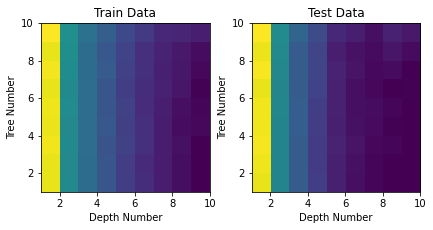

In [23]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax[0].imshow(result_train_shape, extent=[1,10,1,10])
ax[0].set_title("Train Data")
ax[1].imshow(result_test_shape, extent=[1,10,1,10])
ax[1].set_title("Test Data")

ax[0].set(xlabel='Depth Number', ylabel='Tree Number')
ax[1].set(xlabel='Depth Number', ylabel='Tree Number')

We can see that the number of tree doesn't change many things, in contrary to the depth.
The number of tree will be set to 4.

## Influence of depth

In [11]:
result_train_depth = []
result_test_depth = []

for i in range(1,30):
    RF_Regr = RandomForestRegressor(n_estimators=4, max_depth = i)
    RF_Regr.fit(X_train, Y_train)
    result_train_depth.append((i, metrics.mean_squared_error(Y_train, RF_Regr.predict(X_train))))
    result_test_depth.append((i, metrics.mean_squared_error(Y_test, RF_Regr.predict(X_test))))

In [26]:
result_train_shape = np.empty((29,))
result_test_shape = np.empty((29,))
for i in range (0,29):
    result_train_shape[i] = result_train_depth[i][1]
    result_test_shape[i] = result_test_depth[i][1]

[Text(0.5, 15.0, 'Depth Number'),
 Text(209.61818181818177, 0.5, 'Mean Squared Error')]

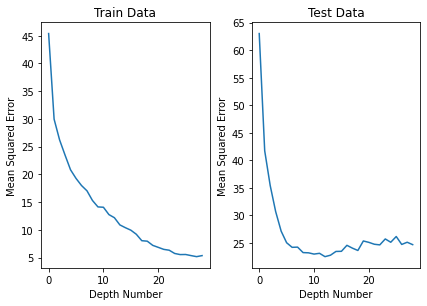

In [35]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax[0].plot(result_train_shape)
ax[0].set_title("Train Data")
ax[1].plot(result_test_shape)
ax[1].set_title("Test Data")

ax[0].set(xlabel='Depth Number', ylabel='Mean Squared Error')
ax[1].set(xlabel='Depth Number', ylabel='Mean Squared Error')

We can see that even if the Mean Square Error decreases with a higher Depth Number on the Train Data, the Test Data Mean Square Error has a higher error with an increasing Depth Number. The Depth number will be set to 12

## Influence of Min Sample Split

In [14]:
result_train_min_sample = []
result_test_min_sample = []

for i in range (2, 17):
    RF_Regr = RandomForestRegressor(n_estimators = 4, max_depth = 12, min_samples_split = i)
    RF_Regr.fit(X_train, Y_train)
    result_train_min_sample.append((i, metrics.mean_squared_error(Y_train, RF_Regr.predict(X_train))))
    result_test_min_sample.append((i, metrics.mean_squared_error(Y_test, RF_Regr.predict(X_test))))

In [15]:
result_train_shape = np.empty((15,))
result_test_shape = np.empty((15,))
for i in range (0, 14):
    result_train_shape[i] = result_train_min_sample[i][1]
    result_test_shape[i] = result_test_min_sample[i][1]
    
#15-te Index liefert Bug wenn iteriert wurde
result_train_shape[14] = result_train_min_sample[14][1]
result_test_shape[14] = result_test_min_sample[14][1]

[Text(0.5, 15.0, 'Min Sample Split'),
 Text(209.61818181818177, 0.5, 'Mean Squared Error')]

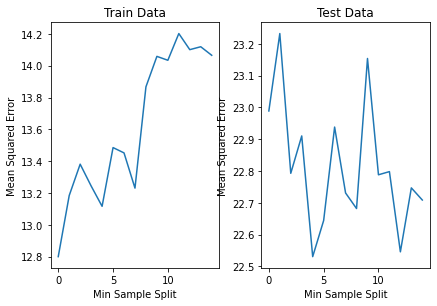

In [16]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax[0].plot(result_train_shape)
ax[0].set_title("Train Data")
ax[1].plot(result_test_shape)
ax[1].set_title("Test Data")

ax[0].set(xlabel='Min Sample Split', ylabel='Mean Squared Error')
ax[1].set(xlabel='Min Sample Split', ylabel='Mean Squared Error')

The modification of the min_test_sample show no real influence to the Test Data Mean Square Score

## Influence of Min Sample Leaf

In [17]:
result_train_min_sample_leaf = []
result_test_min_sample_leaf = []

for i in range (1, 21):
    RF_Regr = RandomForestRegressor(n_estimators = 4, max_depth = 12, min_samples_leaf = i)
    RF_Regr.fit(X_train, Y_train)
    result_train_min_sample_leaf.append((i, metrics.mean_squared_error(Y_train, RF_Regr.predict(X_train))))
    result_test_min_sample_leaf.append((i, metrics.mean_squared_error(Y_test, RF_Regr.predict(X_test))))

In [18]:
result_train_shape = np.empty((20,))
result_test_shape = np.empty((20,))
for i in range (0, 19):
    result_train_shape[i] = result_train_min_sample_leaf[i][1]
    result_test_shape[i] = result_test_min_sample_leaf[i][1]
    
#20-te Index liefert Bug wenn iteriert wurde
result_train_shape[19] = result_train_min_sample_leaf[19][1]
result_test_shape[19] = result_test_min_sample_leaf[19][1]

[Text(0.5, 15.0, 'Min Sample Leaf'),
 Text(209.61818181818177, 0.5, 'Mean Squared Error')]

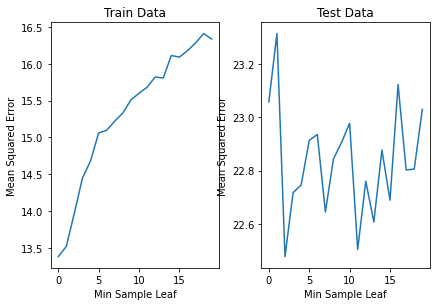

In [19]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax[0].plot(result_train_shape)
ax[0].set_title("Train Data")
ax[1].plot(result_test_shape)
ax[1].set_title("Test Data")

ax[0].set(xlabel='Min Sample Leaf', ylabel='Mean Squared Error')
ax[1].set(xlabel='Min Sample Leaf', ylabel='Mean Squared Error')

There is no real influence of this parameter.
The fastest parameters for this Regressor are estimators of 4 and a depth of 12.

As a conclusion, we can see that the main parameters are the numbers of estimator and the depth.
We also can see that there is overfitting then the maximal depth is higher than 12.